Clustering Data Bintang (Total Stars Dataset)

**Import Library**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


**Load dan Bersihkan Dataset**

In [9]:
# Load dan pilih kolom penting
df = pd.read_csv("total_stars.csv")
df = df[['Star_name', 'Distance', 'Mass', 'Radius', 'Luminosity']]

# Membersihkan nilai numerik
def clean_numeric(column):
    return pd.to_numeric(
        df[column]
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('´', '', regex=False)
        .str.strip(),
        errors='coerce'
    )

for col in ['Distance', 'Mass', 'Radius', 'Luminosity']:
    df[col] = clean_numeric(col)

# Hapus baris kosong
df.dropna(inplace=True)
df.head()


,Star_name,Distance,Mass,Radius,Luminosity
0,Sun,0.000016,1.0,1.00,1.0
1,Sirius,8.600000,2.1,1.71,25.4
2,Canopus,310.000000,15.0,71.00,13500.0
3,Alpha Centauri,4.400000,1.1,1.20,2.0
4,Arcturus,37.000000,1.1,26.00,170.0


**Normalisasi Data**

In [10]:
# Normalisasi fitur numerik
features = df[['Distance', 'Mass', 'Radius', 'Luminosity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


**Elbow Method**

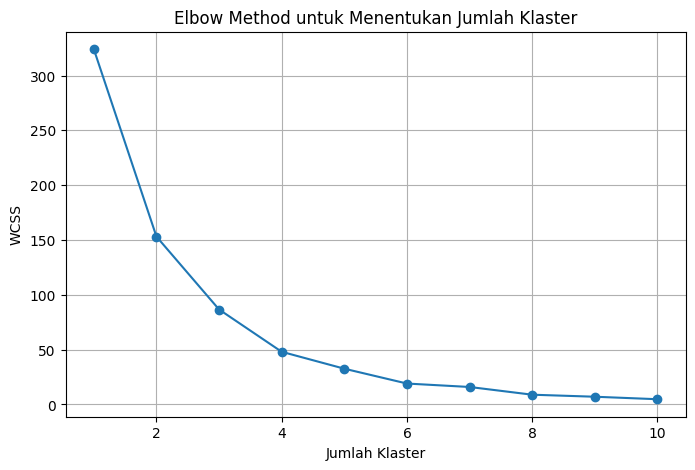

In [11]:
# Menentukan jumlah klaster optimal
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Klaster")
plt.xlabel("Jumlah Klaster")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


**Clustering dengan K-Means**

In [12]:
# Gunakan 4 klaster (hasil elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Tambahkan hasil klaster ke dataset
df['Cluster'] = y_kmeans
df.head()


,Star_name,Distance,Mass,Radius,Luminosity,Cluster
0,Sun,0.000016,1.0,1.00,1.0,0
1,Sirius,8.600000,2.1,1.71,25.4,0
2,Canopus,310.000000,15.0,71.00,13500.0,0
3,Alpha Centauri,4.400000,1.1,1.20,2.0,0
4,Arcturus,37.000000,1.1,26.00,170.0,0


**Visualisasi Klaster**

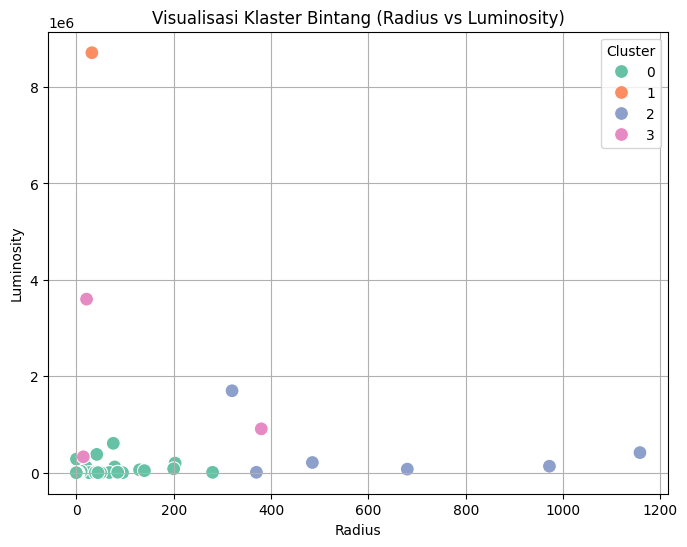

In [13]:
# Visualisasi klaster berdasarkan Radius dan Luminosity
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Radius'], y=df['Luminosity'], hue=df['Cluster'], palette='Set2', s=100)
plt.title("Visualisasi Klaster Bintang (Radius vs Luminosity)")
plt.xlabel("Radius")
plt.ylabel("Luminosity")
plt.grid(True)
plt.show()


**Evaluasi dengan Silhouette Score**

In [14]:
# Evaluasi dengan Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.803
